In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=sns.load_dataset("titanic")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
data.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],inplace=True)

In [6]:
data = pd.get_dummies(data, dtype=int, drop_first=True)
data.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [7]:
data.isnull().sum()

survived        0
pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [8]:
data['age']=data['age'].fillna(data['age'].mean())

In [9]:
data.isnull().sum()

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [10]:
from sklearn.decomposition import PCA

In [11]:
data.shape

(891, 9)

In [12]:
x=data.drop(columns=["survived"])
y=data.survived

In [13]:
pc=PCA(n_components=8)

In [14]:
x.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x, xt, y, yt = train_test_split(
    x, 
    y, 
    test_size=.10, 
    random_state=42, 
    stratify=data.survived
)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [18]:
print(x.shape, " ", xt.shape)

(801, 8)   (90, 8)


In [19]:
x_tr_sc = mms.fit_transform(x)

In [20]:
pd.DataFrame(x_tr_sc).head()

,0,1,2,3,4,5,6,7
0,1.0,0.195778,0.125,0.500000,0.067096,1.0,0.0,1.0
1,0.0,0.195778,0.000,0.166667,0.113168,0.0,0.0,0.0
2,1.0,0.367921,0.000,0.000000,0.047138,1.0,1.0,0.0
3,1.0,0.208344,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.258608,0.000,0.000000,0.015176,1.0,0.0,1.0


In [21]:
x.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
86,3,16.000000,1,3,34.3750,1,0,1
329,1,16.000000,0,1,57.9792,0,0,0
517,3,29.699118,0,0,24.1500,1,1,0
844,3,17.000000,0,0,8.6625,1,0,1
408,3,21.000000,0,0,7.7750,1,0,1


In [22]:
pd.DataFrame(x_tr_sc).head()

,0,1,2,3,4,5,6,7
0,1.0,0.195778,0.125,0.500000,0.067096,1.0,0.0,1.0
1,0.0,0.195778,0.000,0.166667,0.113168,0.0,0.0,0.0
2,1.0,0.367921,0.000,0.000000,0.047138,1.0,1.0,0.0
3,1.0,0.208344,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.258608,0.000,0.000000,0.015176,1.0,0.0,1.0


In [23]:
x_test_sc=mms.transform(xt)

In [24]:
x_tr_pca=pc.fit_transform(x_tr_sc)

In [25]:
variance=pc.explained_variance_ratio_
variance

array([0.35519493, 0.27037625, 0.22840087, 0.06150619, 0.03854018,
       0.02505084, 0.01442896, 0.00650179])

In [26]:
variance.round(decimals=4)*100

array([35.52, 27.04, 22.84,  6.15,  3.85,  2.51,  1.44,  0.65])

In [27]:
cum_var=variance.cumsum().round(decimals=4)*100

In [28]:
cum_var

array([ 35.52,  62.56,  85.4 ,  91.55,  95.4 ,  97.91,  99.35, 100.  ])

In [29]:
import matplotlib.pyplot as plt

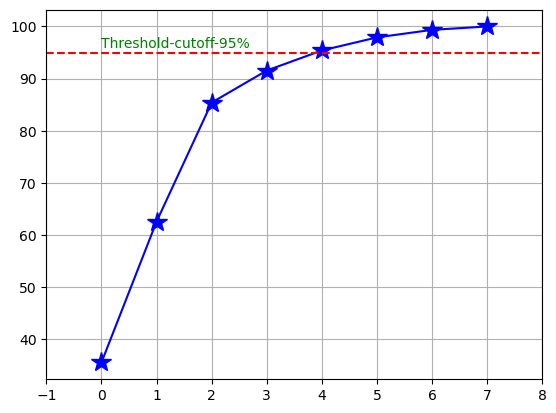

In [30]:
plt.grid()
plt.plot(cum_var, "b", marker='*', ms=15)
plt.axhline(color="r", y=95, linestyle="--")
plt.text(0, 96, "Threshold-cutoff-95%", color="g")
plt.xlim(-1, 8)  # x Line axis value
plt.show()

In [31]:
p=PCA(n_components=5)

In [32]:
x_final=p.fit_transform(x_tr_sc)
x_test_final=p.fit_transform(x_test_sc)

In [33]:
pd.DataFrame(x_final).head()

,0,1,2,3,4
0,0.522484,-0.047255,0.217865,-0.114195,0.327282
1,-1.083962,0.076866,-0.358854,-0.258161,0.103122
2,-0.199361,-1.150749,0.056720,0.491212,0.057941
3,0.544941,-0.080985,0.178259,-0.052274,-0.003244
4,0.544294,-0.079779,0.170652,-0.042600,-0.032453


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_pc=RandomForestClassifier()

In [36]:
rf_pc.fit(x_final,y)

RandomForestClassifier()

In [42]:
res = rf_pc.predict(x_test_final)

In [40]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(yt,res)

0.6